## Review(Log10)과 Installs(Log10)의 상관관계

In [1]:
df = pd.read_csv('3_new.csv')
df.tail()

,Unnamed: 0,Category,Rating,reviews,Size,Installs,Type,Price,Content Rating,Genres,pri_genres,sec_genres,Current_Ver,Ver_Mon,Ver_Year,And_1st_Ver,And_Last_Ver,Installs_log
10834,10834,FAMILY,4.5,38.0,53.0,5000.0,0.0,0.0,Everyone,Education,Education,Education,1.48,7.0,2017.0,4.0,11.0,3.69897
10835,10835,FAMILY,5.0,4.0,3.6,100.0,0.0,0.0,Everyone,Education,Education,Education,1.0,7.0,2018.0,4.0,11.0,2.00000
10836,10836,MEDICAL,0.0,3.0,9.5,1000.0,0.0,0.0,Everyone,Medical,Medical,Medical,1.0,1.0,2017.0,2.0,11.0,3.00000
10837,10837,BOOKS_AND_REFERENCE,4.5,114.0,37.0,1000.0,0.0,0.0,Mature 17+,Books & Reference,Books & Reference,Books & Reference,1.0.0,1.0,2015.0,11.0,11.0,3.00000
10838,10838,LIFESTYLE,4.5,398307.0,19.0,10000000.0,0.0,0.0,Everyone,Lifestyle,Lifestyle,Lifestyle,1.0.0,7.0,2018.0,11.0,11.0,7.00000


In [2]:
df['Reviews_log'] = np.log10(df['reviews'])
df.loc[df.Reviews_log == float('-inf')] = 0

C:\Users\Gk\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
col = ['Category', 'Rating', 'reviews', 'Installs', 'Reviews_log', 'Installs_log']
df1 = df[col]

### Install(Log10)과 Review(Log10)으로 sorting 후 상위 10개 data 번호

In [4]:
df1 = df1.sort_values(by=['Installs_log', 'Reviews_log'], ascending=False)
df1.head(10)

,Category,Rating,reviews,Installs,Reviews_log,Installs_log
2544,SOCIAL,4.1,78158306.0,1.000000e+09,7.892975,9.0
3943,SOCIAL,4.1,78128208.0,1.000000e+09,7.892808,9.0
336,COMMUNICATION,4.4,69119316.0,1.000000e+09,7.839599,9.0
381,COMMUNICATION,4.4,69119316.0,1.000000e+09,7.839599,9.0
3904,COMMUNICATION,4.4,69109672.0,1.000000e+09,7.839539,9.0
2604,SOCIAL,4.5,66577446.0,1.000000e+09,7.823327,9.0
2545,SOCIAL,4.5,66577313.0,1.000000e+09,7.823326,9.0
2611,SOCIAL,4.5,66577313.0,1.000000e+09,7.823326,9.0
3909,SOCIAL,4.5,66509917.0,1.000000e+09,7.822886,9.0
382,COMMUNICATION,4.0,56646578.0,1.000000e+09,7.753174,9.0


In [5]:
df_or = pd.read_csv('googleplaystore.csv')
df_or.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### 상위 10개 data에 대한 app의 이름

In [6]:
df_or.iloc[[2544, 3943, 336, 381, 3904, 2604, 2545, 2611, 3909, 382]].App

2544                                    Facebook
3943                                    Facebook
336                           WhatsApp Messenger
381                           WhatsApp Messenger
3904                          WhatsApp Messenger
2604                                   Instagram
2545                                   Instagram
2611                                   Instagram
3909                                   Instagram
382     Messenger – Text and Video Chat for Free
Name: App, dtype: object

In [7]:
df_r = pd.read_csv('googleplaystore_user_reviews.csv')
df_r.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


### Install과 Review 수 최다 app인 Facebook의 Review Data 분석 - Sentiment로 정렬

In [8]:
df_facebook = df_r.loc[df_r["App"] == 'Facebook']
df_facebook_f = df_facebook.sort_values(by='Sentiment_Polarity', ascending=False)
df_facebook_f.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
42887,Facebook,The best free,Positive,0.700000,0.550000
42904,Facebook,Good,Positive,0.700000,0.600000
42891,Facebook,Beautiful and sweet. *,Positive,0.600000,0.825000
42871,Facebook,Do understand hindi? If understand problem mem...,Positive,0.500000,0.625000
42848,Facebook,I updated Facebook still way find marketplace....,Positive,0.500000,0.500000
42971,Facebook,Some error keeps popping everytime I link sayi...,Positive,0.472222,0.700000
42940,Facebook,Ok I'm kinda fed Facebook right now.... I clue...,Positive,0.428571,0.553571
42961,Facebook,Would great change constantly. The videos inco...,Positive,0.383333,0.544444
42967,Facebook,"Hi Facebook, far awesome. Just hope Facebook p...",Positive,0.366667,1.000000
42844,Facebook,Like wont let post pics groups select pic gall...,Positive,0.350000,0.450000


### Facebook의 Review의 Sentiment 분포도

C:\Users\Gk\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


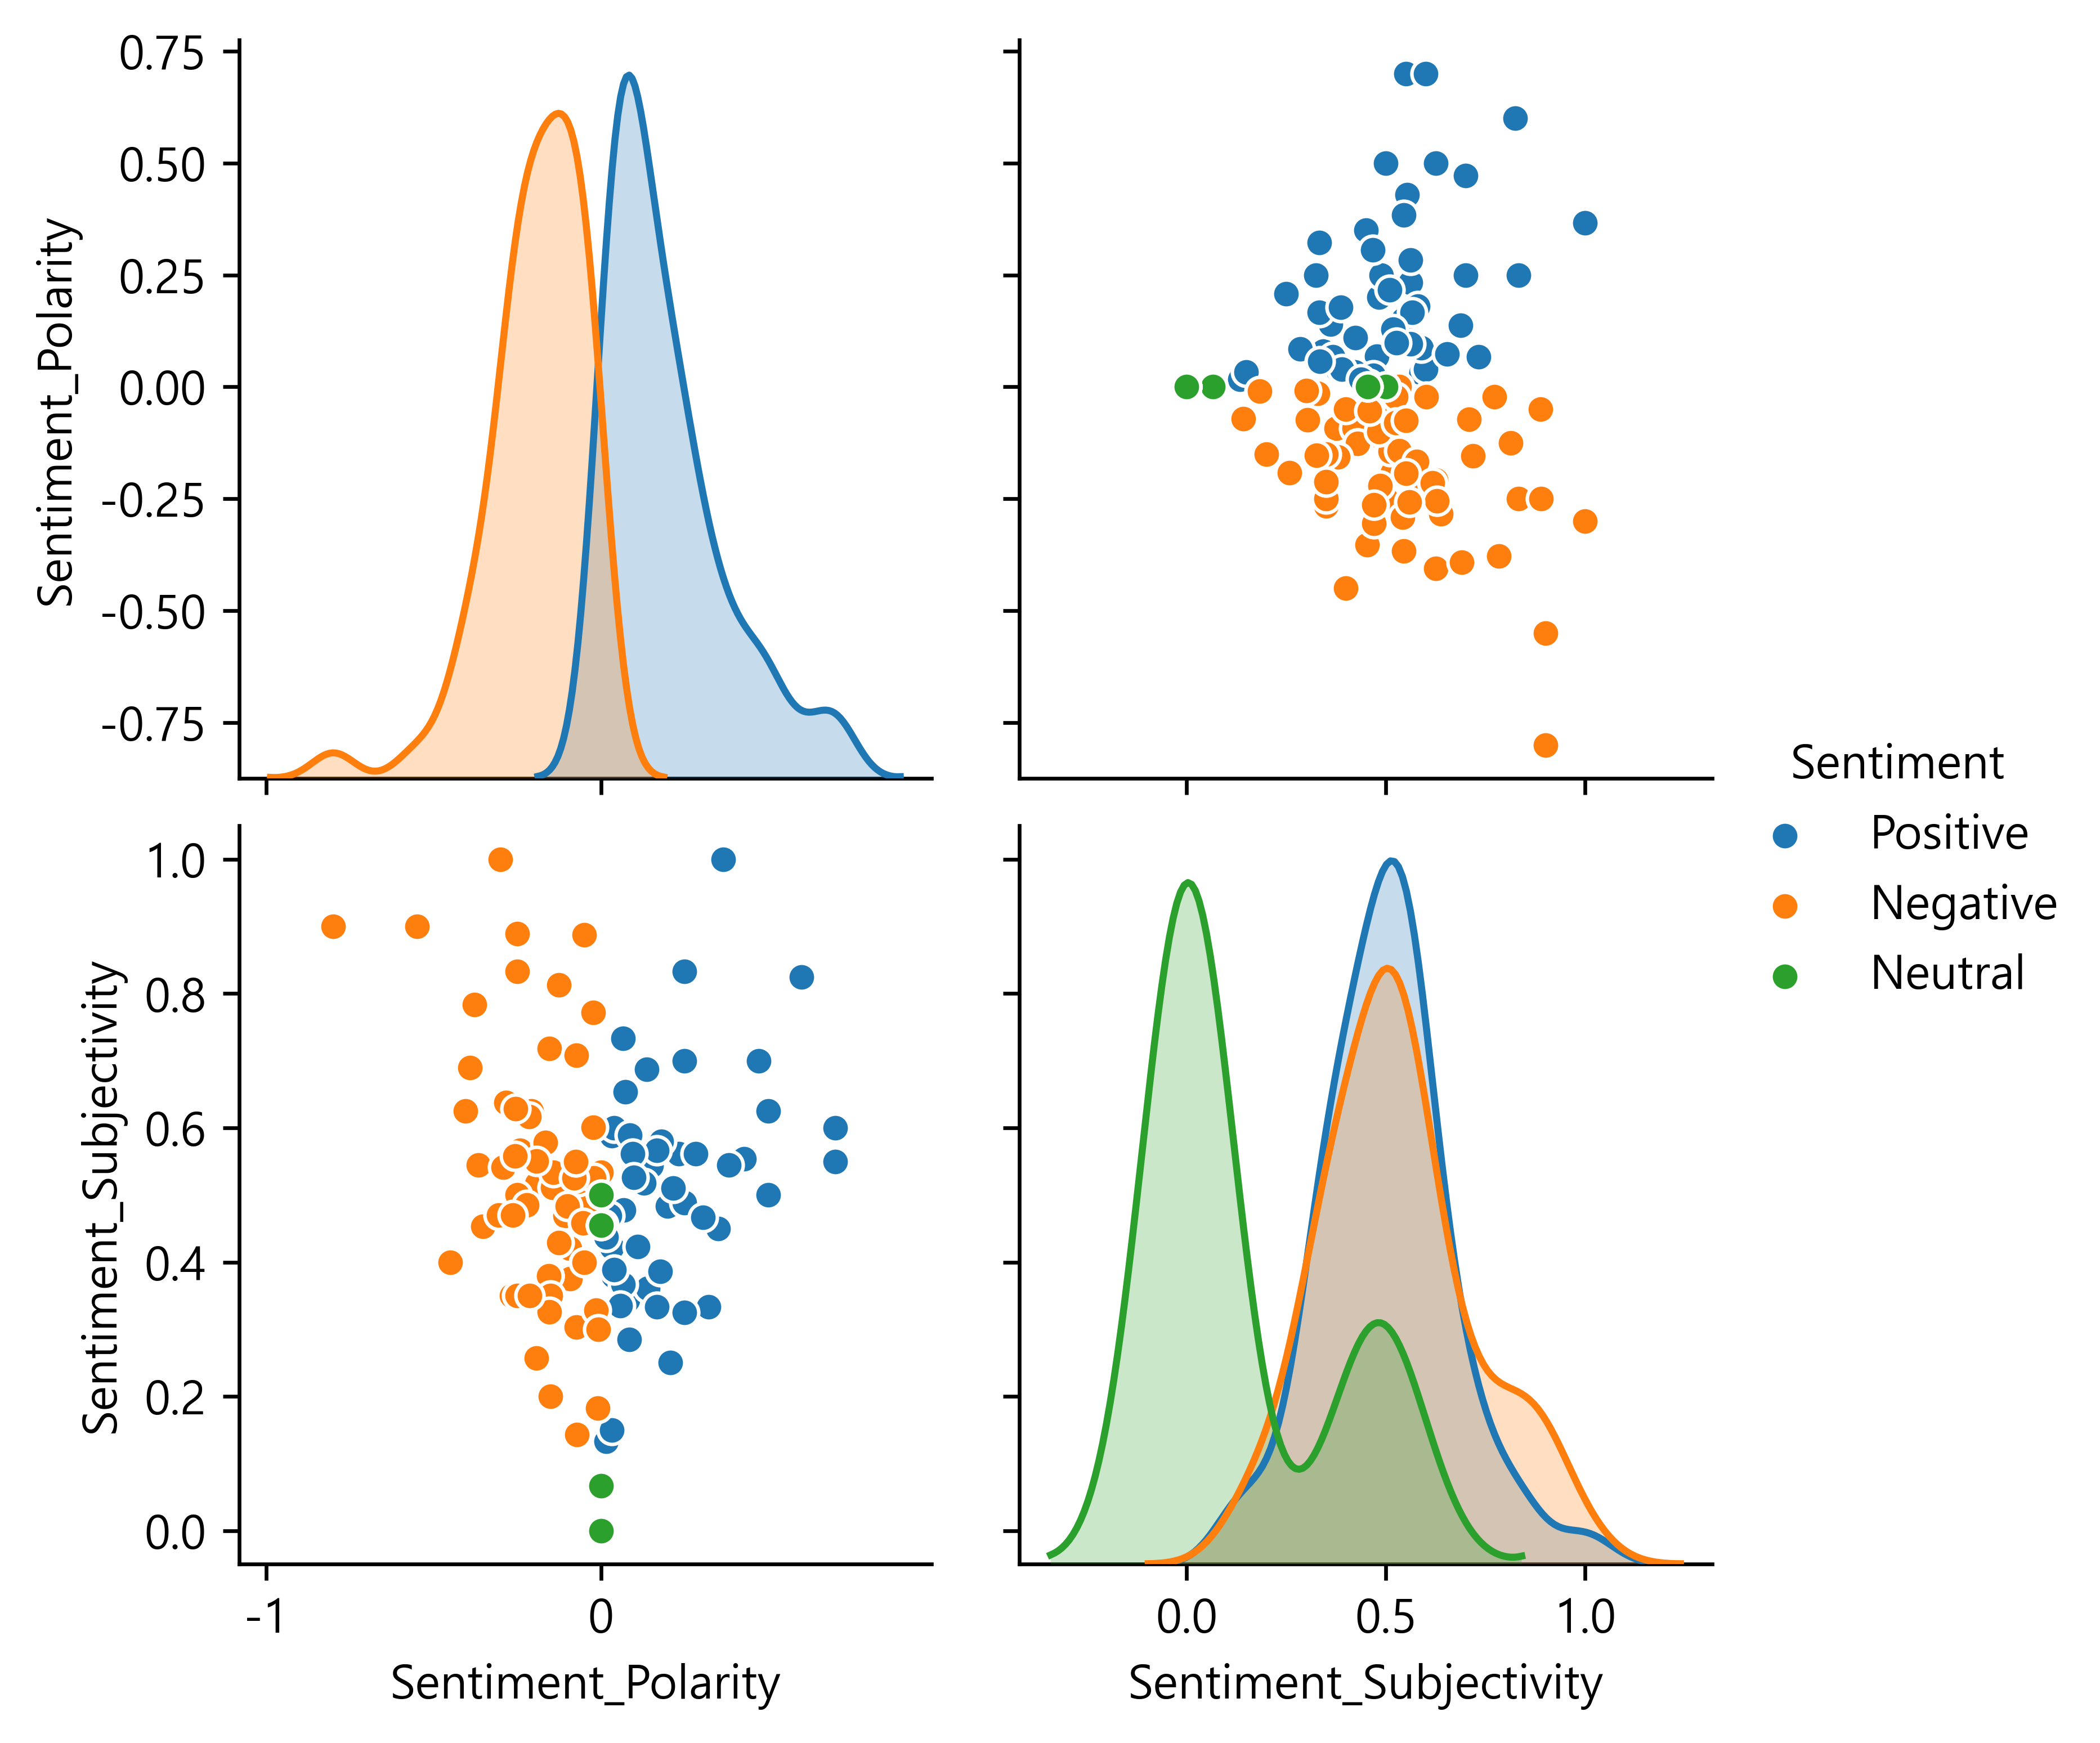

In [9]:
g = sns.pairplot(df_facebook, hue="Sentiment")

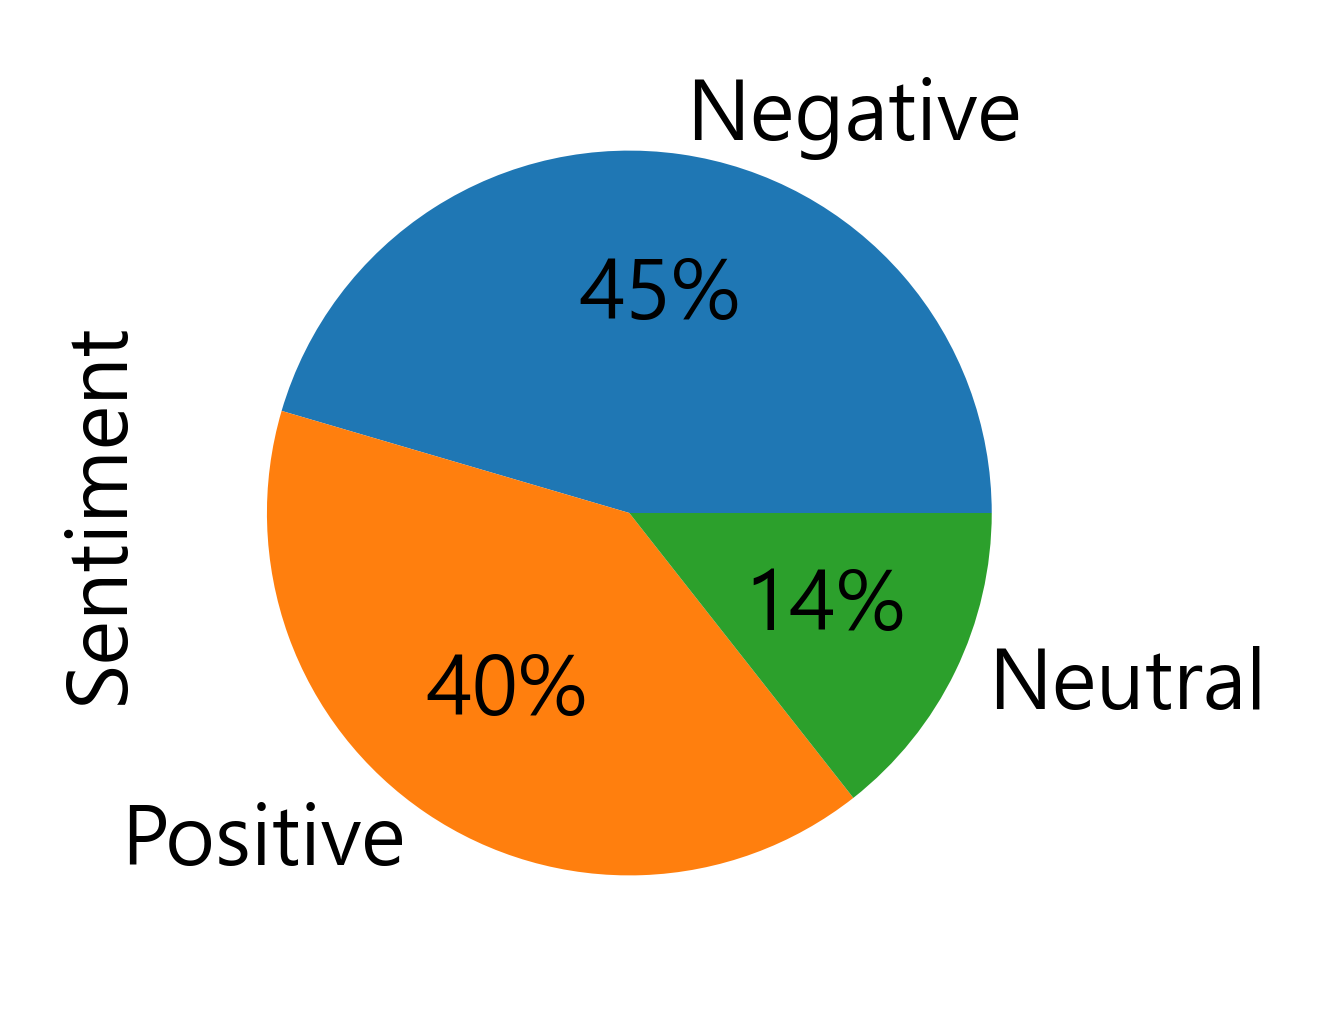

In [49]:
df_facebook["Sentiment"].value_counts().plot.pie(label='Sentiment', autopct='%1.0f%%', figsize=(2, 2))

### 다른 app들에 대한 Review들은 data가 존재하지 않아 분석할 수 없었다.